In [6]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import torch
import seaborn

In [5]:
%pip install -r requirements.txt

  Using cached sklearn-0.0.post9.tar.gz (3.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
     

In [15]:
# read csv data directory
data = pd.read_csv('data_0.csv')

In [16]:
# Specify the pattern to match CSV files (e.g., data_*.csv)
file_pattern = 'data_*.csv'

# Use glob to get a list of file names that match the pattern
file_list = glob.glob(file_pattern)

# Initialize an empty list to store DataFrames
data_frames = []

# Loop through the file names and read each CSV into a DataFrame
for file_name in file_list:
    df = pd.read_csv(file_name)
    data_frames.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_data = pd.concat(data_frames, ignore_index=True)

In [17]:
display(combined_data)

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/01 00:09,11,80010E600,11,80010E600,16.33,US Dollar,16.33,US Dollar,Reinvestment,0
1,2022/09/01 00:09,11,800329930,2776,800816450,335999.68,US Dollar,335999.68,US Dollar,Cheque,0
2,2022/09/01 00:24,11,8003289F0,249457,825F4B630,45.39,US Dollar,45.39,US Dollar,Credit Card,0
3,2022/09/01 00:17,11,800BAFE20,11,800BAFE20,1292.36,US Dollar,1292.36,US Dollar,Reinvestment,0
4,2022/09/01 00:00,32248,80056BBD0,11,800BAFE20,12373.74,US Dollar,12373.74,US Dollar,ACH,0
...,...,...,...,...,...,...,...,...,...,...,...
1727611,2022/09/16 23:56,4,81ACC8D40,279758,81F9B0520,3714.08,Ruble,3714.08,Ruble,Cheque,0
1727612,2022/09/16 23:34,4,8188FDC70,174268,82042DB00,126128.42,Ruble,126128.42,Ruble,Cheque,0
1727613,2022/09/16 23:49,4,8188FDC70,174268,82042DB00,116842.59,Ruble,116842.59,Ruble,Credit Card,0
1727614,2022/09/16 23:55,4,81D3361B0,277240,821E5E1E0,373939.50,Ruble,373939.50,Ruble,Cheque,0


In [18]:
# filter the data where column Is Laundering is 1
laundering_data = combined_data[combined_data['Is Laundering'] == 1]

In [19]:
display(laundering_data)

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
4779,2022/09/06 08:26,7317,81EBF2320,11,81683A320,8377.46,US Dollar,8377.46,US Dollar,ACH,1
4970,2022/09/04 11:45,11,800155780,2408,80027E270,5746.43,Euro,5746.43,Euro,ACH,1
4972,2022/09/05 13:33,11,8003542E0,2408,80027E270,4424.62,Euro,4424.62,Euro,ACH,1
4973,2022/09/02 11:00,24528,80216DF70,11,801BA5360,6504.34,US Dollar,6504.34,US Dollar,ACH,1
5363,2022/09/03 16:26,1148,8009F5930,11,8000764B0,5906.84,US Dollar,5906.84,US Dollar,ACH,1
...,...,...,...,...,...,...,...,...,...,...,...
1721343,2022/09/16 11:25,72269,81A998150,4,81A998590,490534.13,Ruble,490534.13,Ruble,ACH,1
1722826,2022/09/16 14:17,70,100428780,4,817A96440,2630963.09,Rupee,2630963.09,Rupee,Cash,1
1722936,2022/09/19 11:59,4,80EFFBA60,63963,817DFAC70,892661.98,Rupee,892661.98,Rupee,ACH,1
1723988,2022/09/16 16:50,4,813415610,40850,813415660,218412.11,Yen,218412.11,Yen,ACH,1


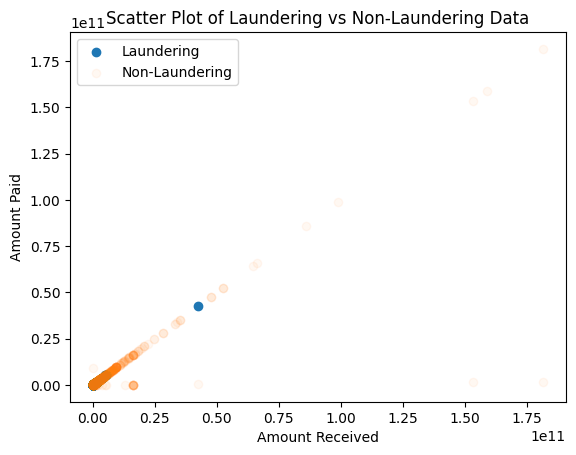

In [22]:
# Extract the relevant data
laundering_data = combined_data[combined_data['Is Laundering'] == True]
non_laundering_data = combined_data[combined_data['Is Laundering'] == False]

# Create the scatter plot
plt.scatter(laundering_data['Amount Received'], laundering_data['Amount Paid'], label='Laundering')
plt.scatter(non_laundering_data['Amount Received'], non_laundering_data['Amount Paid'], label='Non-Laundering', alpha=0.05)

# Add labels and legend
plt.xlabel('Amount Received')
plt.ylabel('Amount Paid')
plt.title('Scatter Plot of Laundering vs Non-Laundering Data')
plt.legend()

# Show the plot
plt.show()

In [21]:
print(combined_data.columns)

Index(['Timestamp', 'From Bank', 'Account', 'To Bank', 'Account.1',
       'Amount Received', 'Receiving Currency', 'Amount Paid',
       'Payment Currency', 'Payment Format', 'Is Laundering'],
      dtype='object')


In [ ]:
# seaborn is a Python data visualization library based on matplotlib
